# A numerical example to solve a linear system by means of a non-probabilistic supervised learning approach

In [3]:
import numpy as np
import matplotlib.pyplot as  plt
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from scipy.integrate import quad

We would to solve a linear system $A\mathbf{x} = \mathbf{b}$ by using a non-probabilistic supervised learning algorithm. To this end we consider the map
$$
\mathcal{E}(\mathbf{x}) =  \frac{1}{2}\| A \mathbf{x} - \mathbf{b}\|^2 = \frac{1}{2} \langle   A \mathbf{x} - \mathbf{b}, A \mathbf{x} - \mathbf{b} \rangle,
$$
where $A$ is a positive definite symmetric matrix. Then,
$$
\mathcal{E}'(\mathbf{x}) =\langle   A \mathbf{x}, A \cdot \rangle - \langle \mathbf{b}, A \cdot \rangle= \langle  A \mathbf{x} - \mathbf{b}, A\cdot \rangle.
$$
The function of interest is for a given $\mathbf{u}_{m-1}$ we need to compute the minimum of
$$
\mathcal{E}(\mathbf{x}+\mathbf{u}_{m-1}) =   \frac{1}{2}\| A \mathbf{x} - (\mathbf{b} - A\mathbf{u}_{m-1}) \|^2
$$

We will consider as a dictionary a cone generated by a finite set of vectors, that is,
$$
\mathcal{D}=\{\lambda \mathbf{x}_i: \lambda \in \mathbb{R} \text{ and } 1 \le i \le n \}.
$$

Then, for each fixed $\mathbf{x} \in \{\mathbf{x}_1,\ldots,\mathbf{x}_n\}$ and $\lambda \in \mathbb{R}$ we have
$$
\mathcal{E}(\lambda \mathbf{x}+\mathbf{u}_{m-1}) =  
\frac{\lambda^2}{2} \langle A \mathbf{x},A \mathbf{x} \rangle- \lambda \langle\mathbf{b}- A\mathbf{u}_{m-1},A\mathbf{x} \rangle + \frac{1}{2} \langle \mathbf{b} - A\mathbf{u}_{m-1}, \mathbf{b} - A\mathbf{u}_{m-1}\rangle.
$$ 


Now, the minimum is then obtained at
$$
\lambda(\mathbf{x},\mathbf{u}_{m-1},A,\mathbf{b}) = \frac{\langle\mathbf{b}- A\mathbf{u}_{m-1},A\mathbf{x} \rangle}{\langle A \mathbf{x},A\mathbf{x}\rangle},
$$
and hence for this value
$$
\mathcal{E}(\lambda \mathbf{x} + \mathbf{u}_{m-1}) = - \frac{1}{2} \frac{\langle\mathbf{b}- A\mathbf{u}_{m-1},A\mathbf{x} \rangle^2}{\langle A \mathbf{x},A\mathbf{x}\rangle}+ \frac{1}{2} \langle \mathbf{b} - A\mathbf{u}_{m-1}, \mathbf{b} - A\mathbf{u}_{m-1}\rangle.
$$
Now, we define two functions called plambda() and Evalue() corresponding to $\lambda(\mathbf{x},\mathbf{0},A,\mathbf{b})$ and $\mathcal{E}(\lambda \mathbf{x}+\mathbf{0}),$ respectively

In [4]:
def plambda(x,A,b):
    s = np.matmul(A,x)
    numerator = np.matmul(b,s)
    denominator = np.matmul(s,s)
    return numerator/denominator

def Evalue(x,A,b):
    s = np.matmul(A,x)
    numerator = np.matmul(b,s)*np.matmul(b,s)
    denominator = np.matmul(s,s)
    return -0.5*numerator/denominator+0.5*np.matmul(b,b)

Now, we will give an example

In [5]:
A = np.array([[2,1],[1,3]])
print(A)
b = np.array([1,-1])
print(b)
solution = np.linalg.solve(A,b)
print(solution)

[[2 1]
 [1 3]]
[ 1 -1]
[ 0.8 -0.6]


We consider as basis

In [6]:
Basis = np.array([[-1,1],[1,1],[2,1]])
print(Basis)

[[-1  1]
 [ 1  1]
 [ 2  1]]


We now proceed with the non-probabilistic supervised learning algorithm 

In [7]:
x = np.zeros(len(b))
Residuals=[]
iter = 0
b = b - np.matmul(A,x)
norm_residual = np.linalg.norm(b)
Residuals = np.append(Residuals,norm_residual)
tolerance = 1.0e-7
while iter < 100 and norm_residual > tolerance:
    iter = iter +1
    E=[]
    param = []
    for i in range(len(Basis)):
        param = np.append(param,plambda(Basis[i,],A,b))
        E = np.append(E,Evalue(Basis[i,],A,b))
    optim = E.argmin()
    u = param[optim]*Basis[optim,]
    x = x + u
    b = b - np.matmul(A,u)
    norm_residual = np.linalg.norm(b)
    Residuals = np.append(Residuals,norm_residual)

The residuals have the following behaviour

[1.41421356e+00 4.47213595e-01 1.41421356e-01 4.47213595e-02
 1.41421356e-02 4.47213595e-03 1.41421356e-03 4.47213595e-04
 1.41421356e-04 4.47213595e-05 1.41421356e-05 4.47213595e-06
 1.41421356e-06 4.47213595e-07 1.41421356e-07 4.47213595e-08]


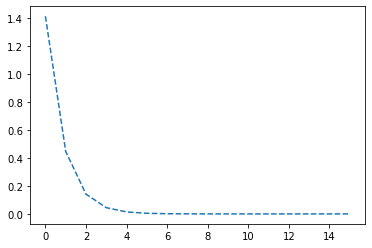

In [8]:
print(Residuals)
plt.plot(Residuals,linestyle='dashed')
plt.show()

The approximate solution and the true solution are the following

In [9]:
print("approximate solution = ",x)
print("true solution = ",solution)

approximate solution =  [ 0.79999998 -0.6       ]
true solution =  [ 0.8 -0.6]
